In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import glob
import pandas as pd
import numpy as np
path =r'/content/drive/My Drive/Colab Notebooks/Bike_sharing/bike_share_csv'
filenames = glob.glob(path + "/*.csv")

trip = []
for filename in filenames:
    trip.append(pd.read_csv(filename,
                            header=0,
                            index_col=False,
                            usecols=["Start date","Start station number","End station number"],
                            dtype={"Start date" : str, "Start station number" : np.int64, "End station number" : np.int64}))
    
# station = []
# for filename in filenames:
#     station.append(pd.read_csv(filename,
#                                header=0,
#                                index_col=False,
#                                usecols=["Start station number","End station number"],
#                                dtype={"Start station number" : np.int64, "End station number" : np.int64}))
# Concatenate all data into one DataFrame
trips = pd.concat(trip, 
                 ignore_index=True)
# stations = pd.concat(station,
#                  ignore_index=True)

ValueError: ignored

In [0]:
e_num = trips['End station number'].isin([0])
res = [i for i, val in enumerate(e_num) if val]

In [0]:
s_num = trips['Start station number'].isin([0])
res1 = [i for i, val in enumerate(s_num) if val]

In [0]:
print((res1))

In [0]:
print(len(res))

In [0]:
z_list=[]
for i in range(len(res)):
  z_list.append(res[i])

for i in range(len(res1)):
  if(res1[i] not in z_list):
    z_list.append(res1[i])
print(len(z_list))

976


In [0]:
trips

In [0]:
trips.drop(z_list, inplace=True)

In [0]:
s_num = trips['Start station number'].isin([0])
res1 = [i for i, val in enumerate(s_num) if val]
print(res1)

[]


In [0]:
e_num = trips['End station number'].isin([0])
res = [i for i, val in enumerate(e_num) if val]
print(res)

[]


In [0]:
trips['trip_no'] = list(range(len(trips)))

In [0]:
trips['month'] = pd.to_datetime(trips['Start date'], format = '%Y/%m/%d %H:%M').dt.month
trips['day'] = pd.to_datetime(trips['Start date'], format = '%Y/%m/%d %H:%M').dt.day
trips['hour'] = pd.to_datetime(trips['Start date'], format = '%Y/%m/%d %H:%M').dt.hour
trips['dayOfWeek'] = pd.to_datetime(trips['Start date'], format = '%Y/%m/%d %H:%M').dt.dayofweek

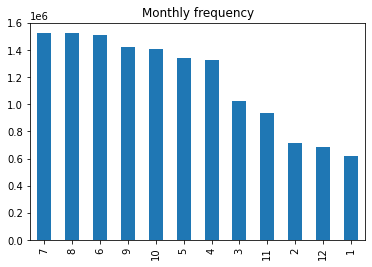

In [0]:
import matplotlib 
trips['month'].value_counts().plot(kind='bar', title='Monthly frequency')

In [0]:
def seasons(month):
  # winter - very less usage
  if month == 12 or month == 1 or month == 2:
    return 0
  # spring - less usage
  elif month == 3 or month == 4 or month == 5:
    return 1
  # fall - frequent usage
  elif month == 9 or month == 10 or month == 11:
    return 2
  # summer - very frequent usage
  elif month == 6 or month == 7 or month == 8:
    return 3

In [0]:
trips['seasons'] = trips['month'].apply(seasons)

In [0]:
trips

,Start date,Start station number,End station number,trip_no,month,day,hour,dayOfWeek,seasons
0,2017-01-01 00:00:41,31634,31208,0,1,1,0,6,0
1,2017-01-01 00:06:53,31258,31270,1,1,1,0,6,0
2,2017-01-01 00:07:10,31289,31222,2,1,1,0,6,0
3,2017-01-01 00:07:22,31289,31222,3,1,1,0,6,0
4,2017-01-01 00:07:36,31258,31270,4,1,1,0,6,0
...,...,...,...,...,...,...,...,...,...
14032867,2019-12-31 23:57:36,31011,31009,14031891,12,31,23,1,0
14032868,2019-12-31 23:57:47,31125,31281,14031892,12,31,23,1,0
14032869,2019-12-31 23:59:37,31047,31085,14031893,12,31,23,1,0
14032870,2019-12-31 23:59:38,31236,31214,14031894,12,31,23,1,0


In [0]:
trips_data = trips.drop(['Start date', 'End station number', 'month', 'day'], axis=1)

In [0]:
trips_data

,Start station number,trip_no,hour,dayOfWeek,seasons
0,31634,0,0,6,0
1,31258,1,0,6,0
2,31289,2,0,6,0
3,31289,3,0,6,0
4,31258,4,0,6,0
...,...,...,...,...,...
14032867,31011,14031891,23,1,0
14032868,31125,14031892,23,1,0
14032869,31047,14031893,23,1,0
14032870,31236,14031894,23,1,0


In [0]:
trips_data = trips_data.groupby(['Start station number', 'seasons', 'dayOfWeek', 'hour'], as_index=False).count()
trips_data.columns= ['start_station', 'seasons', 'dayOfWeek', 'hour', 'total_trips']
trips_data.head()

,start_station,seasons,dayOfWeek,hour,total_trips
0,31000,0,0,0,3
1,31000,0,0,1,1
2,31000,0,0,2,1
3,31000,0,0,5,1
4,31000,0,0,6,4


In [0]:
import math
def average_trips(num):
  return (int) (math.ceil(num / (3 * 4 * 4)))

In [0]:
trips_data['total_trips'] = trips_data['total_trips'].apply(average_trips)

In [0]:
trips_data.total_trips.value_counts()

1     207820
2      34271
3      16492
4       9189
5       5397
6       3388
7       2226
8       1539
9       1096
10       784
11       551
12       401
13       301
14       241
15       167
16       118
17       108
18        66
19        53
20        43
21        35
22        29
23        21
26        13
30        13
24        12
25        12
32        10
27        10
29        10
36         7
28         6
41         6
34         5
40         4
42         4
31         4
35         3
37         2
39         2
38         1
33         1
43         1
Name: total_trips, dtype: int64

In [0]:
trips_data.to_csv(r'/content/drive/My Drive/Colab Notebooks/Bike_sharing/cleaned_csv/trips_data.csv', index = False)

In [0]:
trips['seasons'].value_counts().plot(kind='bar', title='Season frequency')

In [0]:
trips['hour'].value_counts().plot(kind='bar', title='Hourly frequency')

In [0]:
def timeOfDay(hour):
  if hour == 17 or hour == 18  or hour == 8 or hour == 16:
    return 5
  elif hour == 15 or hour == 19 or hour == 13 or hour == 12:
    return 4
  elif hour == 14 or hour == 7 or hour == 9 or hour == 11:
    return 3
  elif hour == 10 or hour == 20 or hour == 21 or hour == 6:
    return 2
  elif hour == 22 or hour == 23 or hour == 0 or hour == 5:
    return 1
  elif hour == 1 or hour == 2 or hour == 4 or hour == 3:
    return 0

In [0]:
trips['time_of_day'] = trips['hour'].apply(timeOfDay)

In [0]:
trips['time_of_day'].value_counts().plot(kind='bar', title='Time of day frequency')

In [0]:
g_trips = trips.groupby(['Start station number', 'time_of_day']).count()

In [0]:
g_trips = g_trips['Start date'].unstack()

In [0]:
g_trips.transpose().isna().sum()

In [0]:
g_trips = g_trips.transpose().fillna(0)

In [0]:
g_trips

In [0]:
import matplotlib.pyplot as plt
g_trips_comp = g_trips[[31245, 31018]]
fig, ax = plt.subplots(figsize=(15,7))
g_trips_comp.plot(ax=ax)

In [0]:
g_trips_normal = g_trips.apply(lambda x: (x-min(x))/(max(x)-min(x)), axis=0)

In [0]:
g_trips_normal = g_trips_normal.transpose()

In [0]:
g_trips_normal

In [0]:
g_trips_normal.to_csv(r'/content/drive/My Drive/Colab Notebooks/Bike_sharing/cleaned_csv/normed_data.csv', index = True)